In [1]:
import torch 
import pandas as pd 
import numpy as np
import torch.nn.functional as F

In [6]:
# Define scores as a tensor instead of a list
scores = torch.tensor([
    [1.2, -torch.inf, -torch.inf, 0.3, 0.7]
])

# Apply softmax along the last dimension
attn_weights = F.softmax(scores, dim=-1)
print(attn_weights)

tensor([[0.4967, 0.0000, 0.0000, 0.2020, 0.3013]])


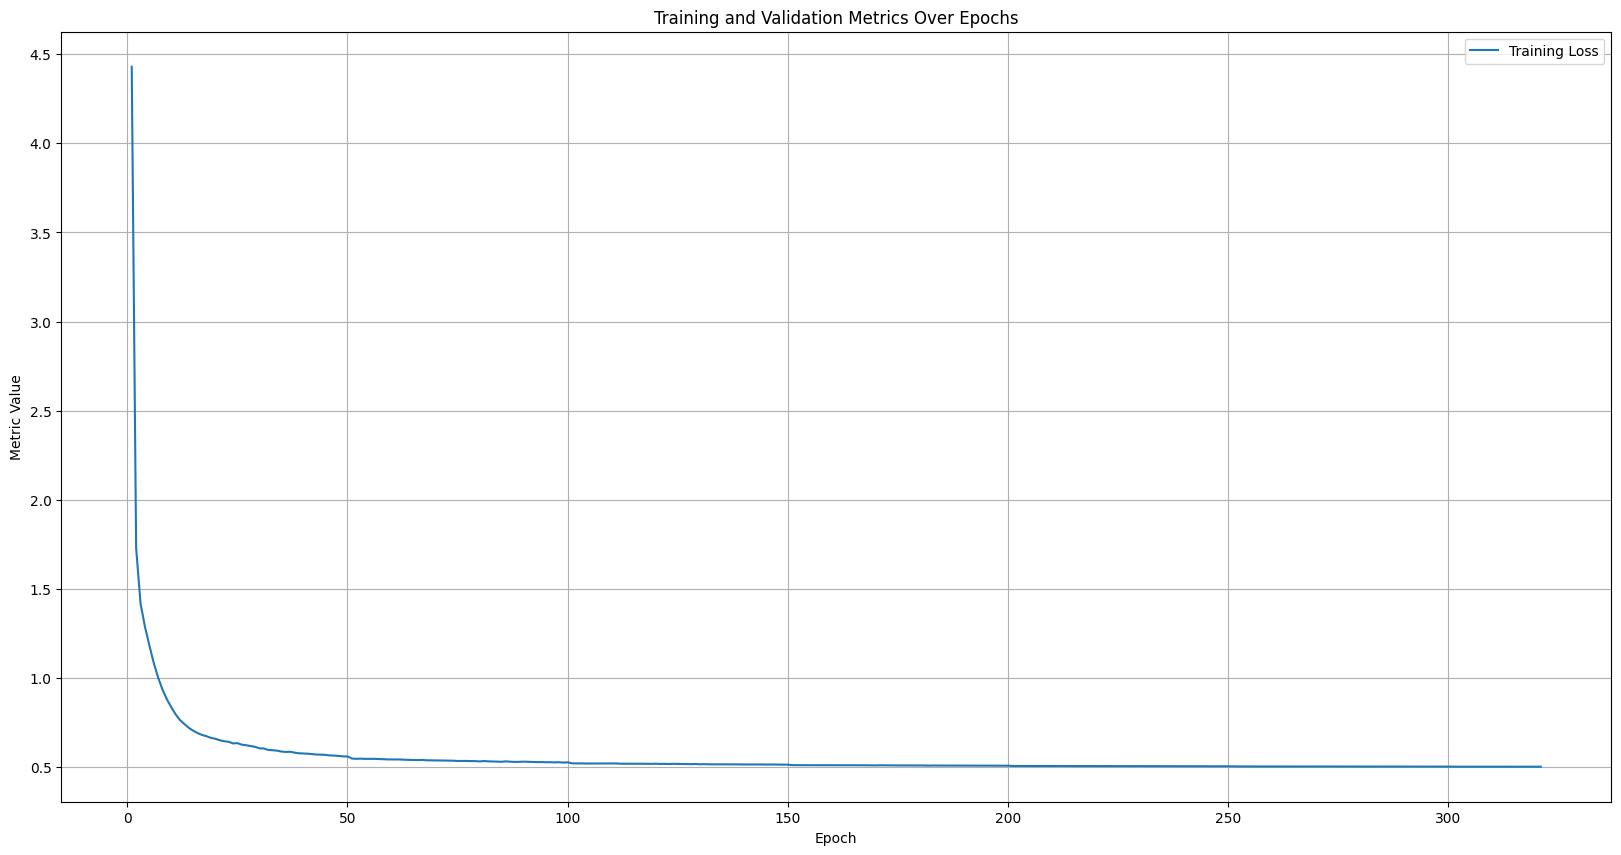

In [2]:
import json
import matplotlib.pyplot as plt

# Load metrics from JSON file
with open('/mnt/storage/huyekgis/brios/BRIOS/models/history/history_base.json', 'r') as file:
    metrics = json.load(file)

# Extract data for plotting
epochs = list(range(1, len(metrics['train_losses']) + 1))
train_losses = metrics['train_losses']
valid_losses = metrics['valid_losses']
rmses = metrics['rmses']

# Plotting
plt.figure(figsize=(20, 10))

# Training and validation loss
plt.plot(epochs[:321], train_losses[:321], label="Training Loss")
# plt.plot([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320],rmses, label="rmse", marker='x')s
# Adding titles and labels
plt.title("Training and Validation Metrics Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid()

# Show plot
plt.show()


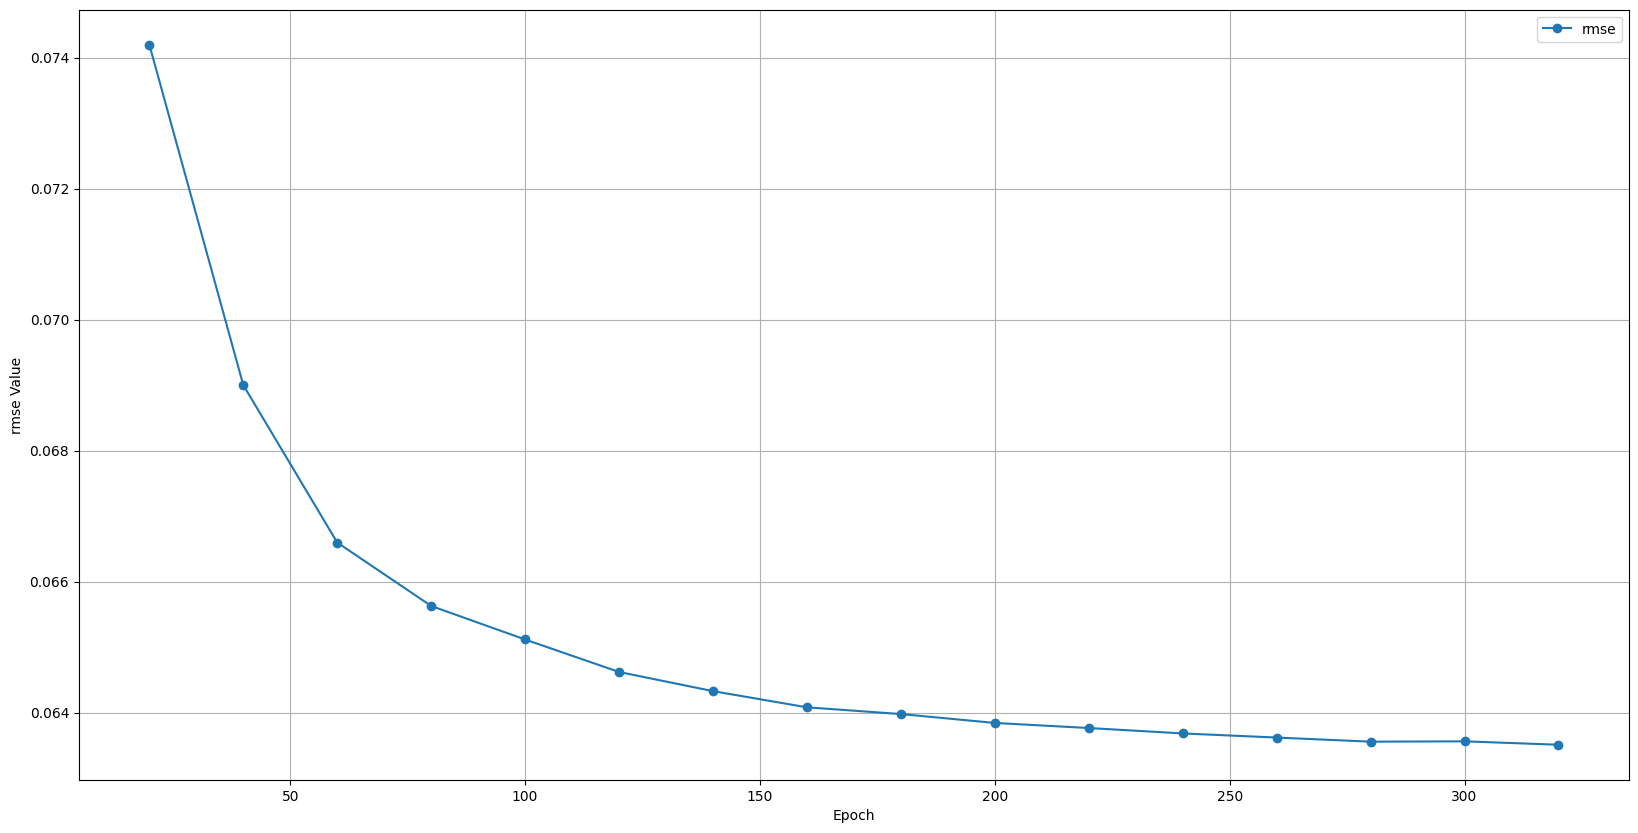

In [4]:
plt.figure(figsize=(20, 10))

# Training and validation loss
plt.plot([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320],rmses[:16], label="rmse", marker='o')
# Adding titles and labels
plt.xlabel("Epoch")
plt.ylabel("rmse Value")
plt.legend()
plt.grid()

# Show plot
plt.show()

In [3]:
import numpy as np

In [4]:
ndvi_data_series = np.load('/mnt/storage/huyekgis/brios/datasets/data2/numpy_data/ndvi.npy')

In [5]:
ndvi_data_series.shape

(160740, 46)

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit mô hình ARIMA với giá trị p lớn để xem xét độ phụ thuộc xa
model = ARIMA(ndvi_data_series[0], order=(10, 0, 0))
model_fit = model.fit()
print(model_fit.summary())


/mnt/storage/huyekgis/brios/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   46
Model:                ARIMA(10, 0, 0)   Log Likelihood                  33.130
Date:                Mon, 11 Nov 2024   AIC                            -42.259
Time:                        14:52:38   BIC                            -20.316
Sample:                             0   HQIC                           -34.039
                                 - 46                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4115      0.081      5.070      0.000       0.252       0.571
ar.L1          0.9823      0.636      1.545      0.122      -0.264       2.228
ar.L2         -0.1472      1.067     -0.138      0.8

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ndvi_data_series[1000])
print(f'p-value: {result[1]}')

MissingDataError: exog contains inf or nans